In [107]:
import torch
from sklearn.datasets import make_blobs
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split


In [108]:
NUM_SAMPLES = 1000
NUM_FEATURES = 2
RANDOM_SEED = 42
NUM_CLASSES = 4

X, y = make_blobs(NUM_SAMPLES, NUM_FEATURES, centers=NUM_CLASSES, random_state=RANDOM_SEED,cluster_std=1.5)
X[:5]

array([[-8.41339595,  6.93516545],
       [-5.76648413, -6.43117072],
       [-6.04213682, -6.76610151],
       [ 3.95083749,  0.69840313],
       [ 4.25049181, -0.28154475]])

In [109]:
# checking the datatype of the dataset returned
print(type(X))

<class 'numpy.ndarray'>


In [110]:
# converting to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# splitting to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED, shuffle=True, test_size=0.2)
X_train[:5]

tensor([[ 5.0405,  3.3076],
        [-2.6249,  9.5260],
        [-8.5240, -9.0402],
        [-6.0262, -4.4375],
        [-3.3397,  7.2175]])

Text(0, 0.5, 'feature 1')

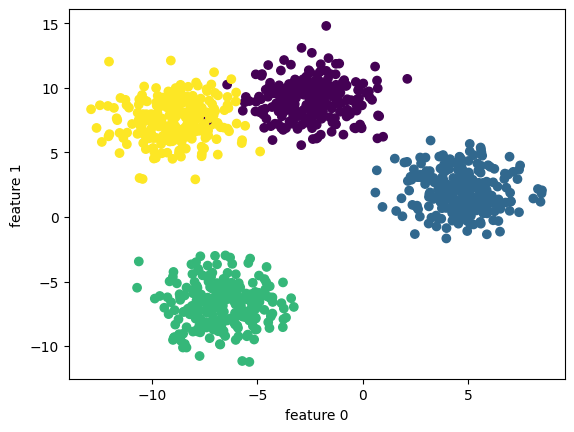

In [111]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

In [112]:
# defining the model

class clf_multi(torch.nn.Module):
    def __init__(self, hidden_nodes):
        super().__init__()
        self.hidden_nodes = hidden_nodes
        self.Layer1 = torch.nn.Linear(in_features=2, out_features=hidden_nodes)
        self.ReLu = torch.nn.ReLU()
        self.Layer2 = torch.nn.Linear(in_features=hidden_nodes, out_features=hidden_nodes)
        self.output = torch.nn.Linear(in_features=hidden_nodes, out_features=4)
        self.SoftMax = torch.nn.Softmax()

    def forward(self, x):
        return self.output(self.ReLu(self.Layer2(self.ReLu(self.Layer1(x)))))


model  = clf_multi(hidden_nodes=5)
model(X_train[:5])

tensor([[-2.3110e-01,  1.0218e+00, -6.5546e-02, -3.0419e-01],
        [-9.8083e-01,  5.5316e-01, -6.9898e-01,  5.4074e-02],
        [-1.1155e-01,  5.6363e-01, -1.7541e-01, -2.8495e-01],
        [-1.0907e-01,  6.5729e-01, -1.7939e-01, -2.9437e-01],
        [-8.1681e-01,  4.5405e-01, -6.2976e-01,  1.1304e-04]],
       grad_fn=<AddmmBackward0>)

In [113]:
# defining loss and optimizer
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [114]:
def accuracy_fn(y_pred, y_true):
    correct = torch.eq(y_pred.squeeze(), y_true.squeeze()).sum()
    return (correct/len(y_pred)) * 100


In [115]:
# training and testing loop
torch.manual_seed(RANDOM_SEED)
epochs = 100

for epoch in range(epochs):
    model.train()
    y_logits = model(X_train)
    y_pred = torch.softmax(y_logits, dim=1)
    y_pred = torch.argmax(y_pred, dim=1)
    
    output_loss = loss(y_logits, y_train.type(torch.long))
    train_acc  = accuracy_fn(y_pred, y_train)
    
    # reset the optimizer grad
    optimizer.zero_grad()

    output_loss.backward()
    optimizer.step()

    # testing 
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=-1)

        test_loss = loss(test_logits, y_test.type(torch.long))
        test_acc = accuracy_fn(test_pred, y_test)

    print(f"loss: {output_loss} acc: {train_acc} | test_loss: {test_loss} test_acc: {test_acc}")    


    # y_pred = torch.argmax(y_pred, dim=1)
  
    

loss: 1.4338793754577637 acc: 27.000001907348633 | test_loss: 1.3217344284057617 test_acc: 49.0
loss: 1.3063981533050537 acc: 49.875 | test_loss: 1.2307575941085815 test_acc: 49.0
loss: 1.2174664735794067 acc: 50.25 | test_loss: 1.1606544256210327 test_acc: 49.0
loss: 1.1491950750350952 acc: 50.25 | test_loss: 1.0887913703918457 test_acc: 49.0
loss: 1.0795551538467407 acc: 50.25 | test_loss: 1.0158052444458008 test_acc: 61.5
loss: 1.0084949731826782 acc: 58.875 | test_loss: 0.9458781480789185 test_acc: 69.5
loss: 0.9389698505401611 acc: 68.5 | test_loss: 0.8826765418052673 test_acc: 72.5
loss: 0.875282347202301 acc: 73.125 | test_loss: 0.8274524211883545 test_acc: 73.0
loss: 0.8198375105857849 acc: 74.125 | test_loss: 0.7809591889381409 test_acc: 73.5
loss: 0.7720871567726135 acc: 74.75 | test_loss: 0.738242506980896 test_acc: 73.5
loss: 0.7298624515533447 acc: 74.75 | test_loss: 0.7017515301704407 test_acc: 73.5
loss: 0.6917081475257874 acc: 74.625 | test_loss: 0.6663583517074585 test

loss: 0.3310108184814453 acc: 98.625 | test_loss: 0.32110050320625305 test_acc: 99.0
loss: 0.3169325888156891 acc: 98.75 | test_loss: 0.30610784888267517 test_acc: 99.0
loss: 0.302681028842926 acc: 98.75 | test_loss: 0.29071563482284546 test_acc: 99.0
loss: 0.2883041501045227 acc: 98.75 | test_loss: 0.27537763118743896 test_acc: 99.5
loss: 0.2737957239151001 acc: 98.75 | test_loss: 0.25980326533317566 test_acc: 99.5
loss: 0.2592002749443054 acc: 99.0 | test_loss: 0.24423566460609436 test_acc: 99.5
loss: 0.2446078658103943 acc: 99.25 | test_loss: 0.2287275195121765 test_acc: 99.5
loss: 0.23010459542274475 acc: 99.25 | test_loss: 0.2134341299533844 test_acc: 99.5
loss: 0.21580275893211365 acc: 99.25 | test_loss: 0.19846411049365997 test_acc: 99.5
loss: 0.2018243968486786 acc: 99.375 | test_loss: 0.18402445316314697 test_acc: 99.5
loss: 0.18833182752132416 acc: 99.375 | test_loss: 0.17025816440582275 test_acc: 99.5
loss: 0.1754559576511383 acc: 99.375 | test_loss: 0.15723608434200287 test

In [116]:
print(y_train[:5])

tensor([1., 0., 2., 2., 0.])
